This code is written to train and test YOLOv3_Tiny Model for Object Detection on Custom Datasets of Toys Images on Google Colab.

Clone darknet from AlexeyAB's famous repository.

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14997, done.
remote: Total 14997 (delta 0), reused 0 (delta 0), pack-reused 14997
Receiving objects: 100% (14997/14997), 13.38 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (10194/10194), done.


I# change makefile to have GPU and OPENCV enabled

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
pwd

'/content/darknet'

In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# get yolov3 tiny pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2021-05-03 19:10:24--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  76.1MB/s    in 0.4s    

2021-05-03 19:10:24 (76.1 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [ ]:
# imshow def is only used in this program

def imshow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width,3*height),interpolation=cv2.INTER_CUBIC)

  plt.figure(figsize=(18,10))
  plt.imshow(cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB))
  plt.show()

  
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name,'wb') as f:
      f.write(data)
      print("file saved", name)

def download(path):
  from google.colab import files
  files.download(path)


Now test the model


!./darknet detect <.cfg file> <.weight file> <.jpg test image file> -thresh 0.3 <.thresh is optional>

In [ ]:
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/person.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

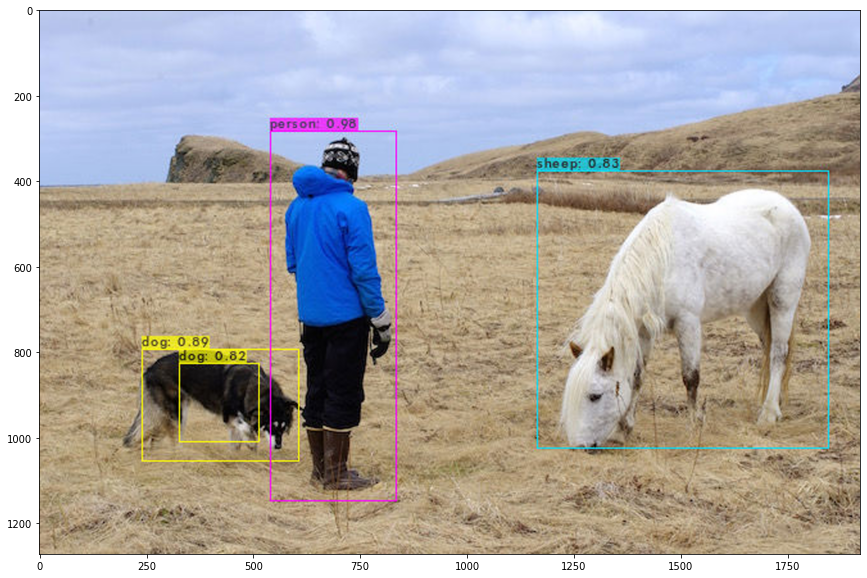

In [ ]:
imshow("predictions.jpg")

Now Train and Test YOLOv3_Tiny Model on Custom Data of Images - Toys.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /my_drive
!ls /my_drive

 AI					  'Getting started.pdf'
 audit					   IELTS
 BOM.xlsx				  'Rate List.pdf'
 BOM.xlsx.gsheet			  'RICERCA ENTERPRISES.PDF'
'Colab Notebooks'			  'TAEHWA C Fans Specification .xlsx'
'Customer Profiling Form (2).xls'	   VAIO
'Customer Profiling Form (2).xls.gsheet'   VIPUL_DIM-ME_Edit-2.mp4
'Document from Vipul Becil'		   yolov3


Now upload "custom_Data" folder on your google drive.
The following cell will unzip inside of darknet which will create custom_data folder

In [ ]:
!unzip /my_drive/yolov3/custom_data.zip -d /content/darknet/

Archive:  /my_drive/yolov3/custom_data.zip
   creating: /content/darknet/custom_data/
  inflating: /content/darknet/custom_data/create_image_path.ipynb  
  inflating: /content/darknet/custom_data/.DS_Store  
   creating: /content/darknet/__MACOSX/
   creating: /content/darknet/__MACOSX/custom_data/
  inflating: /content/darknet/__MACOSX/custom_data/._.DS_Store  
   creating: /content/darknet/custom_data/images/
  inflating: /content/darknet/custom_data/images/.DS_Store  
   creating: /content/darknet/__MACOSX/custom_data/images/
  inflating: /content/darknet/__MACOSX/custom_data/images/._.DS_Store  
   creating: /content/darknet/custom_data/images/test/
  inflating: /content/darknet/custom_data/images/test/IMG20200405222729.txt  
   creating: /content/darknet/__MACOSX/custom_data/images/test/
  inflating: /content/darknet/__MACOSX/custom_data/images/test/._IMG20200405222729.txt  
  inflating: /content/darknet/custom_data/images/test/IMG20200405154300.jpg  
  inflating: /content/darknet

In [ ]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
pwd

'/content/darknet'

Final command to start tarining on yolo 

In [ ]:
!./darknet detector train custom_data/colab_detector.data custom_data/cfg/yolov3-tiny_custom.cfg yolov3-tiny.conv.11 -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3-tiny_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 16, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF


In [ ]:
# To restart tarining from last trained weight saved in google drive
#!./darknet detector train custom_data/colab_detector.data custom_data/cfg/yolov3_custom.cfg /my_drive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [ ]:
#!rm -r /content/darknet/__MACOSX

In [ ]:
#!rm -r /content/darknet/custom_data

In [ ]:
pwd

'/content/darknet'

In [ ]:
# Training Log
imshow('/content/darknet/chart.png')

In [ ]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
pwd

'/content/darknet'

In [ ]:
# change cfg file for testing the image

%cd custom_data/cfg
!sed -i 's/batch=16/batch=1/' yolov3-tiny_custom.cfg
!sed -i 's/subdivisions=4/subdivisions=1/' yolov3-tiny_custom.cfg
%cd ..


/content/darknet/custom_data/cfg
/content/darknet/custom_data


In [ ]:
%cd ..

/content/darknet


In [ ]:
pwd

'/content/darknet'

!./darknet detector test <.data file> <.cfg file> <.weights file> <.jpg image file> -thresh 0.3


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

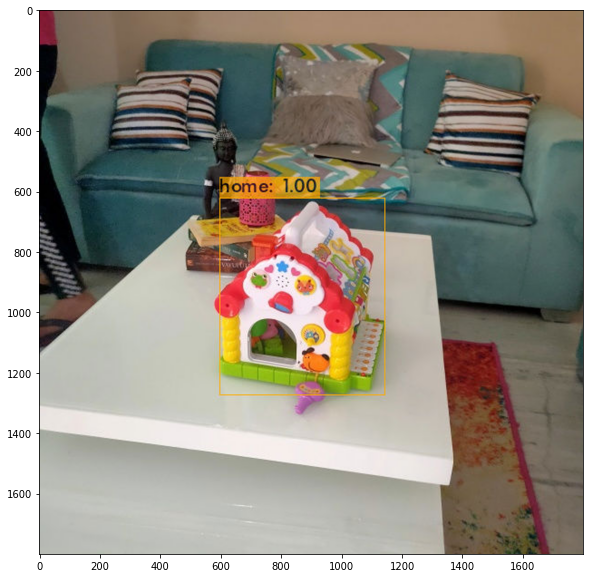

In [ ]:
#run and test the model which you got inside google drive 
!./darknet detector test custom_data/colab_detector.data custom_data/cfg/yolov3-tiny_custom.cfg /my_drive/yolov3/backup/yolov3-tiny_custom_last.weights /content/darknet/custom_data/images/test/IMG20200405154745.jpg -thresh 0.3
imshow('/content/darknet/predictions.jpg')

Thanks 

VIPUL KAMBOJ